### Introduction
Using Fashion MNIST Dataset. Dataset contains a training set of 60,000 examples and a test set of 10,000 examples. 
Each example is a 28x28 grayscale image, associated with a label from 10 classes.



In [1]:
import numpy as np
import pandas as pd
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Load training and test data into dataframes
data_train = pd.read_csv('dataset/fashion-mnist_train.csv')
data_test = pd.read_csv('dataset/fashion-mnist_test.csv')

# X forms the training images, and y forms the training labels
X = np.array(data_train.iloc[:, 1:])
y = to_categorical(np.array(data_train.iloc[:, 0]))

# Splitting the training data to sub-training (80%) and validation data (20%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

# X_test forms the test images, and y_test forms the test labels
X_test = np.array(data_test.iloc[:, 1:])
y_test = to_categorical(np.array(data_test.iloc[:, 0]))

Using TensorFlow backend.


### Data Processing

Splitting the Datasets into Training, Testing and Validation Sections




In [2]:
# Each image's dimension is 28 x 28
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

# Prepare the training images
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_train = X_train.astype('float32')
X_train /= 255

# Prepare the test images
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_test = X_test.astype('float32')
X_test /= 255

# Prepare the validation images
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)
X_val = X_val.astype('float32')
X_val /= 255

### CNN with 4 Convolution Layers
CNN will process input size of (28,28,1) which is the format of the FashionMNIST images. I do this by passing the argument input_shape=(28, 28, 1) to the first layer.
* This model has 4 *Conv2D* layers, 2 *MaxPooling* layers, 6 *BatchNormalization* layers, and 5 *Dropout* layers.

* There are 10 classes of fashion images, using a final layer with 10 outputs and a softmax activation. 


In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn.add(BatchNormalization())

cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.25))

cnn.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())

cnn.add(Dense(512, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.5))

cnn.add(Dense(128, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.5))

cnn.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [4]:
cnn.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

### CNN Design

In [5]:
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        18496     
__________

* 1,219,754 parameters are available to be trained.
* The output of the *Conv2D* and *MaxPooling2D* layers are 3D tensors of shape *(height, width, channels)*.
* The number of channels is controlled by the 1st argument passed to the *Conv2D* layer (32).
* The (4, 4, 128) outputs from the 3rd *Dropout* layer are flattened into vectors of shape (2048,) before going through 3 *Dense* layers.

## Training the Model

I will train a Convolutional Neural Network classifier with 4 convolution layer using the Keras deep learning library. I also use **batch normalization** to preprocess every layer of the network. The model is first trained for 10 epochs with batch size of 256, compiled with `categorical_crossentropy` loss function and `Adam` optimizer.


In [6]:
history = cnn.fit(X_train, y_train,
          batch_size=256,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 90s 2ms/step - loss: 0.7619 - acc: 0.7328 - val_loss: 0.5264 - val_acc: 0.7922
Epoch 2/10
48000/48000 [==============================] - 89s 2ms/step - loss: 0.4503 - acc: 0.8383 - val_loss: 0.3364 - val_acc: 0.8732
Epoch 3/10
48000/48000 [==============================] - 89s 2ms/step - loss: 0.3703 - acc: 0.8693 - val_loss: 0.3144 - val_acc: 0.8847
Epoch 4/10
48000/48000 [==============================] - 89s 2ms/step - loss: 0.3265 - acc: 0.8844 - val_loss: 0.2975 - val_acc: 0.8907
Epoch 5/10
48000/48000 [==============================] - 89s 2ms/step - loss: 0.3057 - acc: 0.8902 - val_loss: 0.2826 - val_acc: 0.8985
Epoch 6/10
48000/48000 [==============================] - 88s 2ms/step - loss: 0.2870 - acc: 0.8974 - val_loss: 0.2564 - val_acc: 0.9061
Epoch 7/10
48000/48000 [==============================] - 89s 2ms/step - loss: 0

In [9]:
score = cnn.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.23059502950310706
Test accuracy: 0.9197


Model's accuracy is 90.52%

### Plotting CNN's Accuracy and Loss Graphs

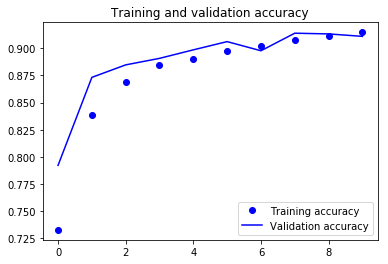

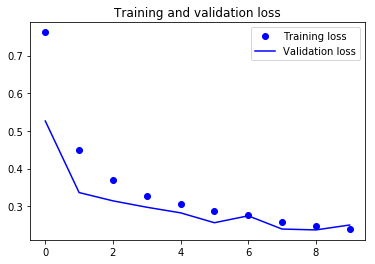

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Classification Report

Summarizing the performance of my classifier as follows - 

In [14]:
# Predictions for the test data
predicted_classes = cnn.predict_classes(X_test)

# Indices to be plotted
y_true = data_test.iloc[:, 0]
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

In [15]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.87      0.88      0.88      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.86      0.91      0.89      1000
     Class 3       0.92      0.94      0.93      1000
     Class 4       0.91      0.86      0.88      1000
     Class 5       0.99      0.95      0.97      1000
     Class 6       0.79      0.75      0.77      1000
     Class 7       0.90      0.99      0.94      1000
     Class 8       0.99      0.97      0.98      1000
     Class 9       0.99      0.94      0.96      1000

   micro avg       0.92      0.92      0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

